In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from numpy import isnan
from pandas import read_csv
from sklearn.impute import KNNImputer

In [4]:
df_train = pd.read_csv('C:/Users/STRUSI Cosimo/Documents/Uni/mammographic_masses.data')
df_train["BI-RADS"] = df_train["BI-RADS"].astype("string")
df_train['SHAPE'] = df_train["SHAPE"].astype("string")
df_train['MARGIN'] = df_train["MARGIN"].astype("string")
df_train['SEVERITY'] = df_train["SEVERITY"].astype("string")
df_train['DENSITY'] = df_train["DENSITY"].astype("string")
df_train["AGE"] = df_train["AGE"].astype("string")
severity = df_train['SEVERITY']
severity = pd.to_numeric(severity)
index_dato_sbagliato = df_train[(df_train['BI-RADS']=="55")].index.tolist()
df_train['BI-RADS'][index_dato_sbagliato] = "5"

df_train = df_train.replace("?", np.nan)


severity = df_train['SEVERITY']
df_train = df_train.drop(columns=["SEVERITY"])
df_train = df_train.drop(columns=["BI-RADS"])


df_train['MARGIN'] = df_train.MARGIN.map({'1':1,'2':2,'3':3,"4":4,'5':5})
df_train['SHAPE'] = df_train.SHAPE.map({'1':1,'2':2,'3':3,"4":4})
df_train['DENSITY'] = df_train.DENSITY.map({'1':1,"2":2,'3':3,"4":4})

severity = pd.to_numeric(severity)

df_train['AGE'] = pd.to_numeric(df_train['AGE'])

imputer = KNNImputer(n_neighbors=1, weights='uniform')
#imputer.fit(df_trainNAN)
df_train = imputer.fit_transform(df_train)

print('Missing: %d' % sum(isnan(df_train).flatten()))

df_train = pd.DataFrame(df_train, columns = ['AGE','SHAPE','MARGIN','DENSITY'])

#DIMENSIONI FINALI
df_train.shape
print(df_train.describe())


Missing: 0
              AGE       SHAPE      MARGIN     DENSITY
count  961.000000  961.000000  961.000000  961.000000
mean    55.550468    2.714880    2.772112    2.898023
std     14.472812    1.242426    1.569598    0.397919
min     18.000000    1.000000    1.000000    1.000000
25%     45.000000    2.000000    1.000000    3.000000
50%     57.000000    3.000000    3.000000    3.000000
75%     66.000000    4.000000    4.000000    3.000000
max     96.000000    4.000000    5.000000    4.000000


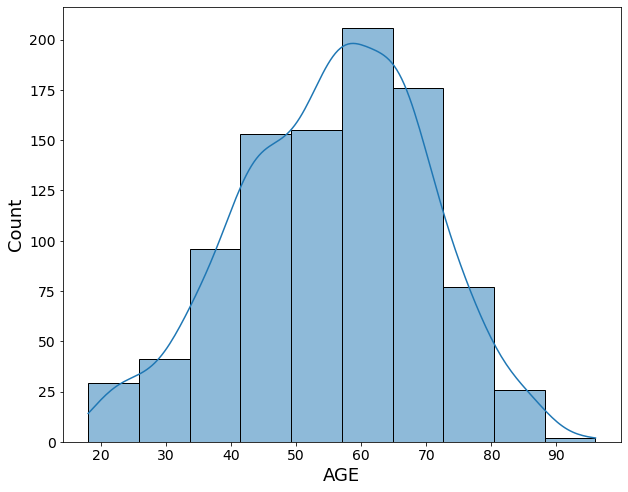

In [5]:
#PLOT ETA
fig, axes = plt.subplots(1, 1, figsize=(10, 8))

# Plot frequency plot/ histogram

sns.histplot(x="AGE", kde=True, data=df_train, ax=axes, bins=10);
axes.set(xlabel="AGE");
axes.xaxis.label.set_size(18)
axes.yaxis.label.set_size(18)
axes.tick_params('y', labelsize = 14);
axes.tick_params('x', labelsize = 14);

<AxesSubplot:xlabel='AGE'>

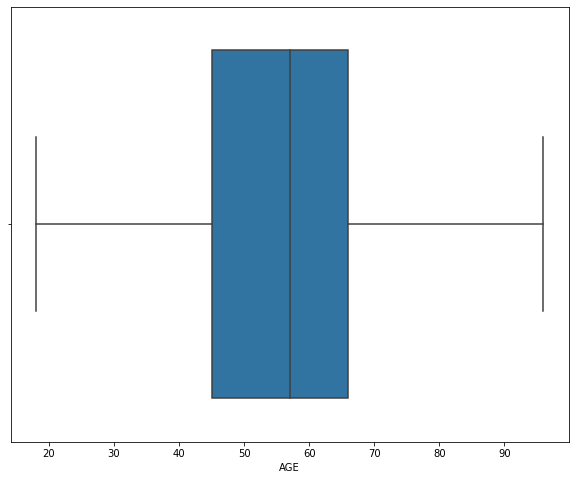

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(10, 8))
sns.boxplot(x='AGE', data=df_train)

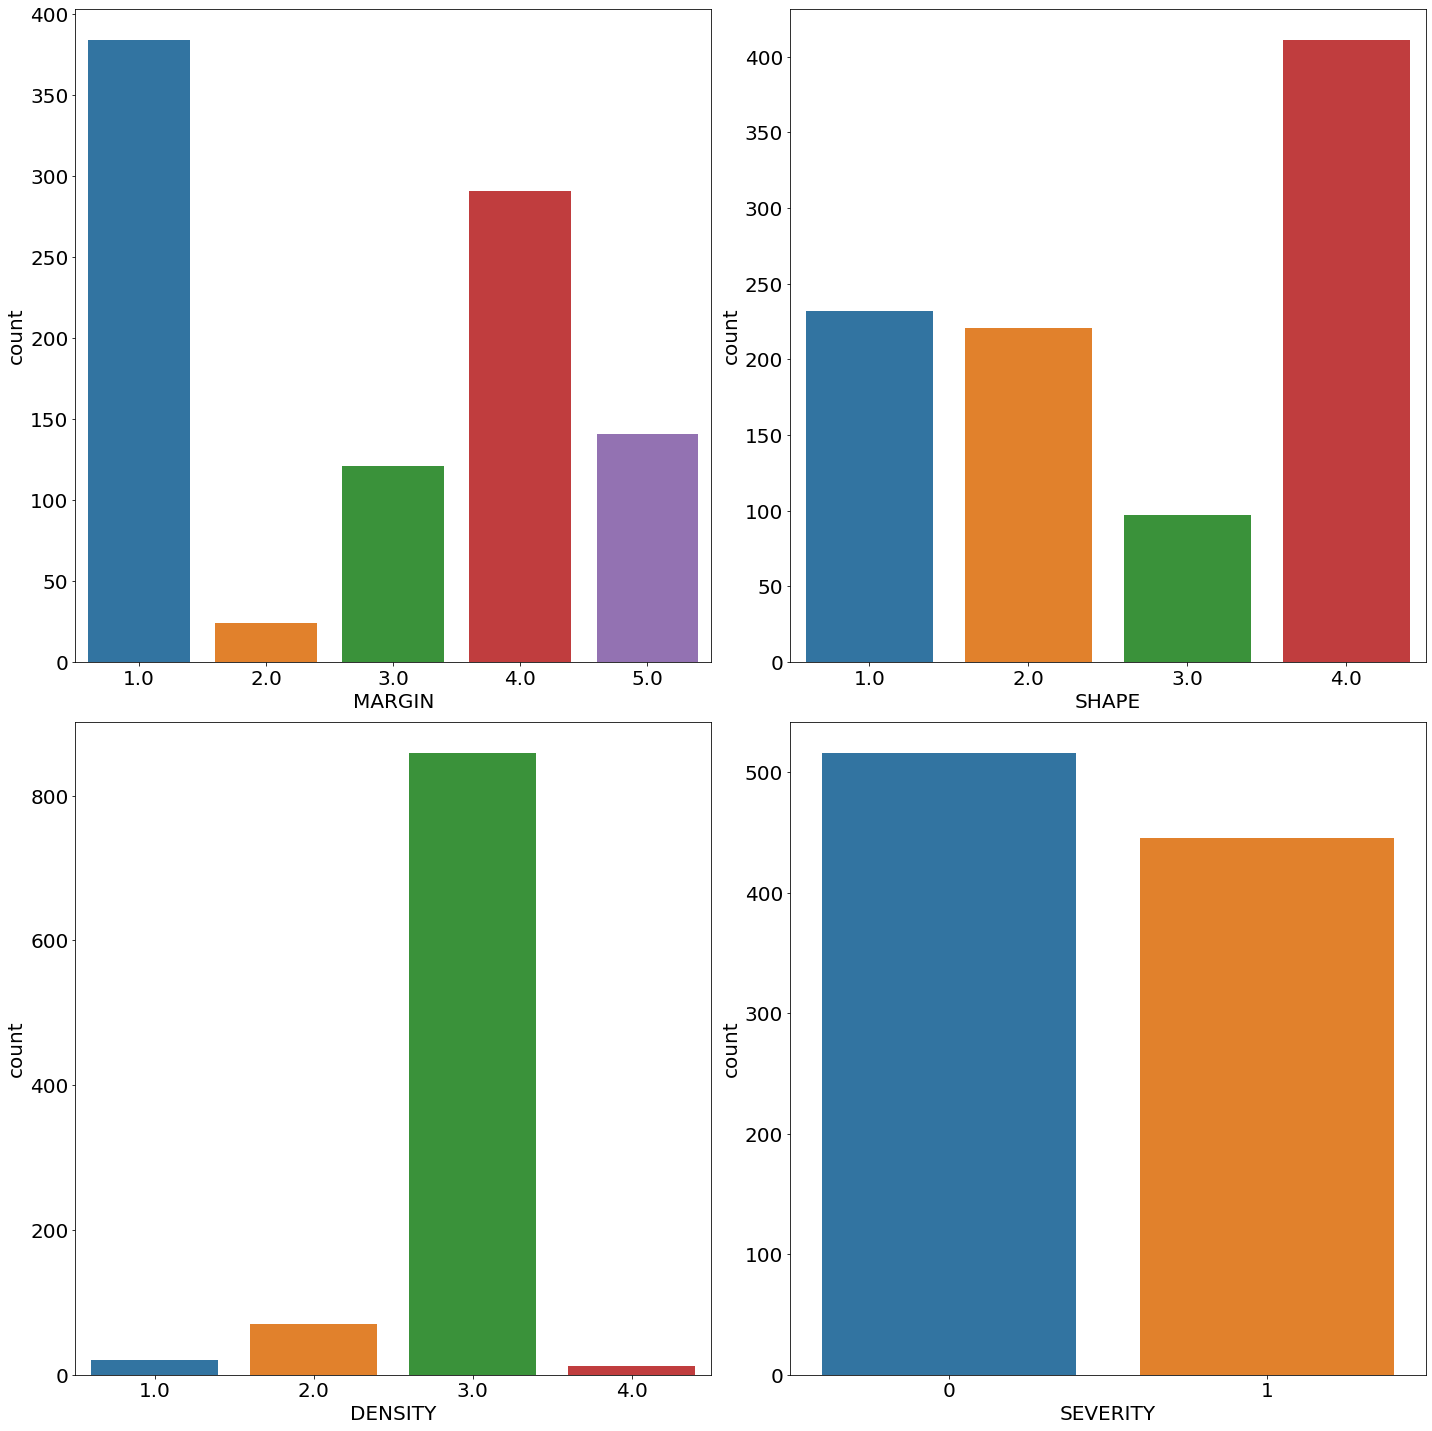

In [7]:
#PLOT
df_train['SEVERITY'] = severity
fig, ax = plt.subplots(2, 2, figsize=(20, 20));
for variable, subplot in zip(['MARGIN','SHAPE','DENSITY','SEVERITY'], ax.flatten()):
    subplot.xaxis.label.set_size(20)
    subplot.yaxis.label.set_size(20)
    subplot.tick_params('y', labelsize = 20);
    subplot.tick_params('x', labelsize = 20);
    cp = sns.countplot(x=df_train[variable], ax=subplot);
plt.tight_layout()

<AxesSubplot:>

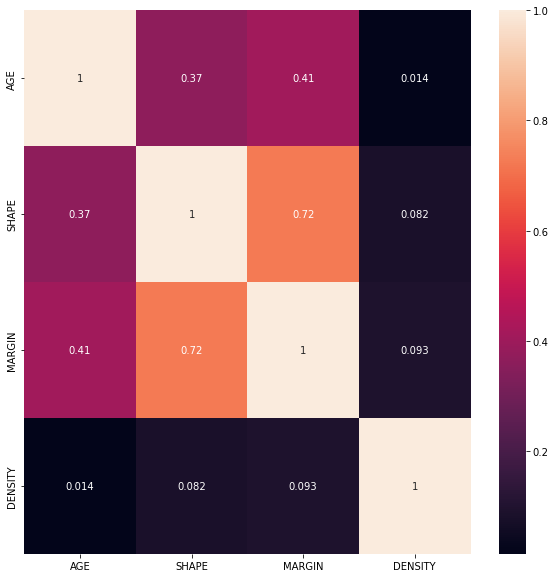

In [8]:
#HEATMAP
df_train = df_train.drop(columns=["SEVERITY"])
fig = plt.figure(figsize=(10,10))
sns.heatmap(df_train.corr(), annot=True)


In [9]:
feature_names=['AGE', 'SHAPE', 'MARGIN', 'DENSITY']
features=df_train[['AGE', 'SHAPE', 'MARGIN', 'DENSITY']].values
classes=severity.values


from sklearn.model_selection import train_test_split
train_features, test_features, train_classes, test_classes=train_test_split(features, classes, test_size=0.2, random_state=0)
print(train_features)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(train_features)

train_features=scaler.transform(train_features)
test_features=scaler.transform(test_features)

print(train_features)

[[32.  2.  1.  3.]
 [49.  4.  4.  3.]
 [57.  2.  5.  3.]
 ...
 [31.  2.  1.  3.]
 [83.  4.  5.  3.]
 [64.  4.  3.  3.]]
[[-1.59210492 -0.57692603 -1.13509188  0.25548807]
 [-0.4314951   1.0313469   0.77664181  0.25548807]
 [ 0.11467422 -0.57692603  1.41388638  0.25548807]
 ...
 [-1.66037608 -0.57692603 -1.13509188  0.25548807]
 [ 1.88972453  1.0313469   1.41388638  0.25548807]
 [ 0.59257238  1.0313469   0.13939725  0.25548807]]


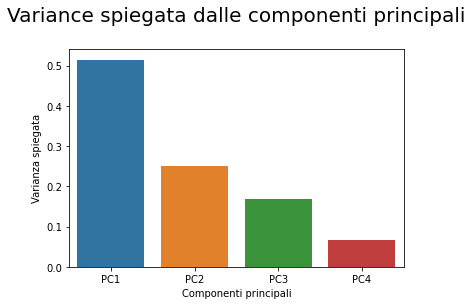

In [10]:
from sklearn.decomposition import PCA
pca=PCA()
train_f_pca=pca.fit_transform(train_features)
test_f_pca=pca.transform(test_features)

df = pd.DataFrame({'Varianza spiegata':pca.explained_variance_ratio_,
             'Componenti principali':['PC1','PC2', 'PC3', 'PC4']})
sns.barplot(x='Componenti principali',y="Varianza spiegata", data=df)
plt.title("Variance spiegata dalle componenti principali\n", fontsize=20)
plt.show()


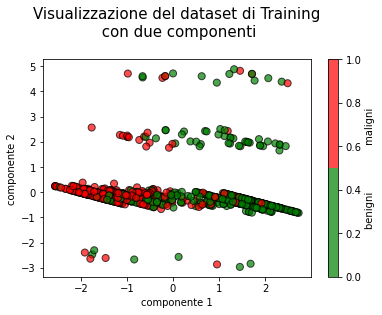

In [11]:
from matplotlib.colors import ListedColormap
pca2 = PCA(2)  # project from 4 to 2 dimensions
train_f_pca2=pca2.fit_transform(train_features)
test_f_pca2=pca2.transform(test_features)

plt.scatter(train_f_pca2[:, 0], train_f_pca2[:, 1], c=train_classes, edgecolor='k',s=50, alpha=0.7, cmap=ListedColormap(('g','r')))
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title("Visualizzazione del dataset di Training\n con due componenti\n", fontsize=15)
plt.colorbar(label='benigni'+" "*15+'maligni')
plt.show()

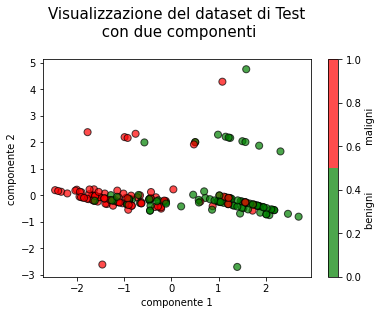

In [12]:
plt.scatter(test_f_pca2[:, 0], test_f_pca2[:, 1], c=test_classes, edgecolor='black',s=50, alpha=0.7, cmap=ListedColormap(('g','r')))
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title("Visualizzazione del dataset di Test\n con due componenti\n", fontsize=15)
plt.colorbar(label='benigni'+" "*15+'maligni')
plt.show()

In [13]:
classifier =LogisticRegression(solver="liblinear", random_state=0)
classifier.fit(train_f_pca2, train_classes)
pred_c = classifier.predict(test_f_pca2)

0.8046875


<AxesSubplot:>

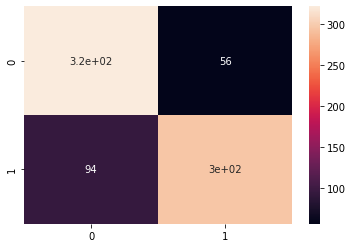

In [14]:
print(accuracy_score(classifier.predict(train_f_pca2), train_classes))
sns.heatmap(confusion_matrix(classifier.predict(train_f_pca2), train_classes),annot=True)

0.7772020725388601


<AxesSubplot:>

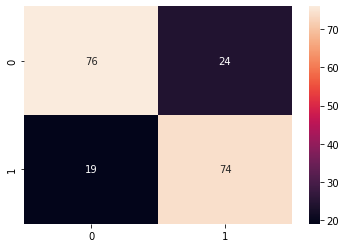

In [15]:
print(accuracy_score(test_classes, classifier.predict(test_f_pca2)))
sns.heatmap(confusion_matrix(test_classes, classifier.predict(test_f_pca2)),annot=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

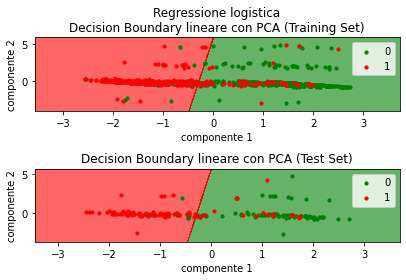

In [16]:
plt.subplot(2,1,1)


X_set, y_set = train_f_pca2, train_classes
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),\
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],s=10,
                c = ListedColormap(('green', 'red'))(i), label = j)
plt.title('Regressione logistica\nDecision Boundary lineare con PCA (Training Set)')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.legend()
       
plt.subplot(2,1,2)




X_set, y_set = test_f_pca2, test_classes
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),\
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],s=10, c = ListedColormap(('green', 'red'))(i), label = j)
plt.title('Decision Boundary lineare con PCA (Test Set)')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.legend()
plt.tight_layout()
plt.show()


In [17]:
classifier = RandomForestClassifier(max_depth=3, n_estimators=100)
classifier.fit(train_f_pca2, train_classes)
pred_c = classifier.predict(test_f_pca2)

0.8138020833333334


<AxesSubplot:>

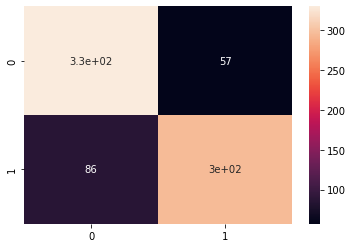

In [18]:
print(accuracy_score(classifier.predict(train_f_pca2), train_classes))
sns.heatmap(confusion_matrix(classifier.predict(train_f_pca2), train_classes),annot=True)


0.7875647668393783


<AxesSubplot:>

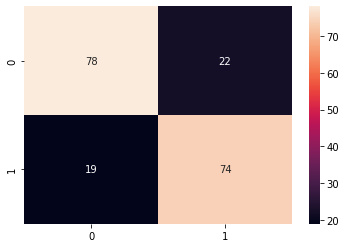

In [19]:
print(accuracy_score(test_classes, classifier.predict(test_f_pca2)))
sns.heatmap(confusion_matrix(test_classes, classifier.predict(test_f_pca2)),annot=True)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

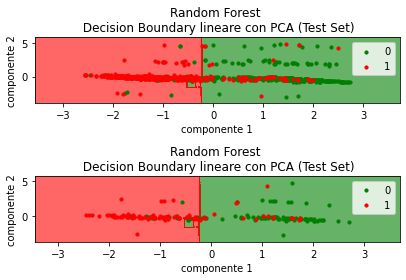

In [20]:

plt.subplot(2,1,1)
#Train set boundary
X_set, y_set = train_f_pca2, train_classes
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),\
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],s=10,
                c = ListedColormap(('green', 'red'))(i), label = j)
plt.title('Random Forest \n Decision Boundary lineare con PCA (Test Set)')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.legend()
       
plt.subplot(2,1,2)
#Test set boundary
X_set, y_set = test_f_pca2, test_classes
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),\
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.6, cmap = ListedColormap(('green', 'red')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],s=10, c = ListedColormap(('green', 'red'))(i), label = j)
plt.title('Random Forest \n Decision Boundary lineare con PCA (Test Set)')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.legend()
plt.tight_layout()
plt.show()   

In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


models={SVC(kernel="rbf", C=1, gamma=1, probability=True):"SVM",
    LogisticRegression(solver="liblinear", random_state=0):"RL",
    KNeighborsClassifier(n_neighbors=10):'KNN',
    RandomForestClassifier(max_depth=3, n_estimators=100, random_state=0):'RF',
    DecisionTreeClassifier(random_state=0):'AD'}

for model in models:
    model.fit(train_features, train_classes)
    pred_c=model.predict(test_features)
    accc=accuracy_score(test_classes, pred_c)
    #sns.heatmap(confusion_matrix(test_c,pred_c),annot=True)
    print("ACCURATEZZA PER ", models[model], " è ", accc.round(2))

ACCURATEZZA PER  SVM  è  0.78
ACCURATEZZA PER  RL  è  0.79
ACCURATEZZA PER  KNN  è  0.75
ACCURATEZZA PER  RF  è  0.77
ACCURATEZZA PER  AD  è  0.71


In [22]:
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit_transform(features)


dict2={1:[],2:[],3:[],4:[],5:[]}
i = 0

for model in models:
    score=cross_val_score(model,features,classes, cv=10)
    dict2[i] = score
    print("ACCURATEZZA PER  ", models[model], "con cros. val. è ",'{:3.2f}'.format(score.mean()))   
    i=i+1


ACCURATEZZA PER   SVM con cros. val. è  0.79
ACCURATEZZA PER   RL con cros. val. è  0.80
ACCURATEZZA PER   KNN con cros. val. è  0.78
ACCURATEZZA PER   RF con cros. val. è  0.81
ACCURATEZZA PER   AD con cros. val. è  0.75


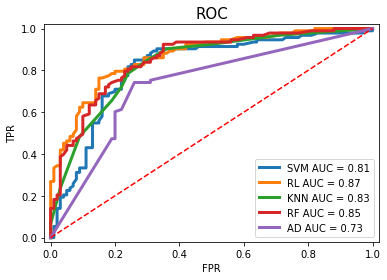

In [24]:
from sklearn.metrics import roc_curve, auc
models={SVC(kernel="rbf", C=1, gamma=1, probability=True):"SVM",
    LogisticRegression(solver="liblinear", random_state=0):"RL",
    KNeighborsClassifier(n_neighbors=10):'KNN',
    RandomForestClassifier(max_depth=3, n_estimators=100):'RF',
    DecisionTreeClassifier():'AD'}
for model in models:
    model.fit(train_features,train_classes)
    prob=model.predict_proba(test_features)
    fpr, tpr, thresholds=roc_curve(test_classes, prob[:,1])
    roc_auc=auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=3, label=models[model]+' AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC', fontsize=15)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [25]:
from scipy import stats
for i in range(0,4):
    for j in range(i+1,5):
        print("confronto modello ", i , " con modello " , j)
        print(stats.ttest_ind(dict2[i], dict2[j]))



confronto modello  0  con modello  1
Ttest_indResult(statistic=-0.500414192785203, pvalue=0.6228465939132517)
confronto modello  0  con modello  2
Ttest_indResult(statistic=0.4692968689324226, pvalue=0.6444919637564597)
confronto modello  0  con modello  3
Ttest_indResult(statistic=-1.0549208661473513, pvalue=0.30541625351222745)
confronto modello  0  con modello  4
Ttest_indResult(statistic=1.7849723116140734, pvalue=0.09112848430216974)
confronto modello  1  con modello  2
Ttest_indResult(statistic=1.022835524422668, pvalue=0.31993650132988155)
confronto modello  1  con modello  3
Ttest_indResult(statistic=-0.5667201010072775, pvalue=0.5779034366211919)
confronto modello  1  con modello  4
Ttest_indResult(statistic=2.483431461894775, pvalue=0.02308889502859451)
confronto modello  2  con modello  3
Ttest_indResult(statistic=-1.6536994664821278, pvalue=0.11552212345615745)
confronto modello  2  con modello  4
Ttest_indResult(statistic=1.3290733920509896, pvalue=0.20042567936340022)
con